In [1]:
import pandas as pd
import numpy as np

/tmp/ipykernel_8117/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("Synthetic_dataset_1")

In [3]:
X=df.drop('Class',axis=1)
Y=df['Class']

In [4]:
x=X.to_numpy()
y=Y.to_numpy()

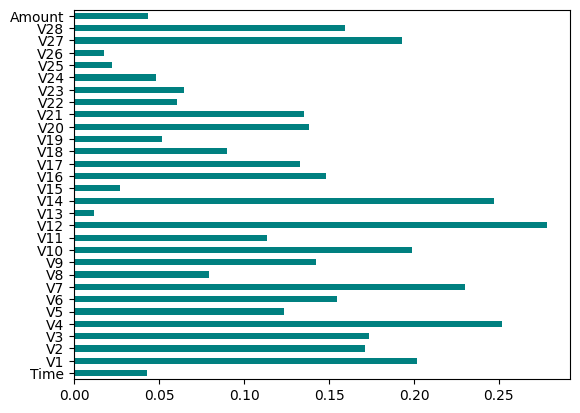

In [5]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importance =mutual_info_classif(X,Y)
feat_importance=pd.Series(importance,df.columns[0:len(df.columns)-1])
feat_importance.plot(kind='barh', color='teal')
plt.show()

In [6]:
from scipy.sparse import *
from skfeature.utility.construct_W import construct_W


In [13]:
from sklearn.model_selection import train_test_split

# Sample a smaller subset (adjust sample_size as needed)
sample_size = 10000
X_sample, _, y_sample, _ = train_test_split(x, y, test_size=1 - sample_size/len(y), random_state=42)

# Calculate Fisher core on the sample dataset
# (Use a different feature selection method or implement custom logic)


In [16]:
X_sample


array([[ 7.30769584e+04,  2.34247383e-01,  6.97955210e-01, ...,
         1.63595837e-01,  3.05533966e-01,  5.91187980e+02],
       [ 1.54950358e+05,  1.34305446e+00,  9.49568797e-01, ...,
         3.96489736e-01,  8.46077094e-02,  5.64573901e-01],
       [ 7.56525848e+03, -2.26092416e+00, -1.78084631e+00, ...,
         1.23045950e+00,  7.76375213e-01,  1.24140268e+02],
       ...,
       [ 5.57533726e+04, -2.32748483e+00, -8.61359100e-01, ...,
        -5.41080399e-01,  2.17978235e+00,  5.17564820e+01],
       [ 0.00000000e+00, -2.27136356e+00,  1.19104998e+00, ...,
         6.30639679e-02,  6.33291012e-02,  0.00000000e+00],
       [ 2.31300642e+04, -2.77193833e+00,  2.39979369e+00, ...,
         2.29200929e-01,  8.37917209e-02,  4.35132441e+00]])

In [17]:
from skfeature.function.similarity_based import fisher_score
%matplotlib inline
ranls=fisher_score.fisher_score(X_sample,y_sample)

<Axes: >

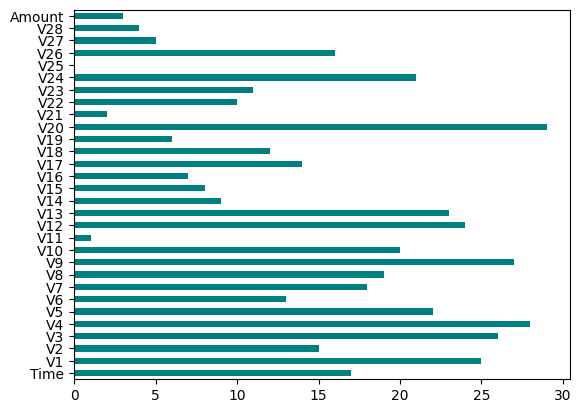

In [18]:
importances=pd.Series(ranls,df.columns[0:len(df.columns)-1])
importances.plot(kind='barh',color='teal')

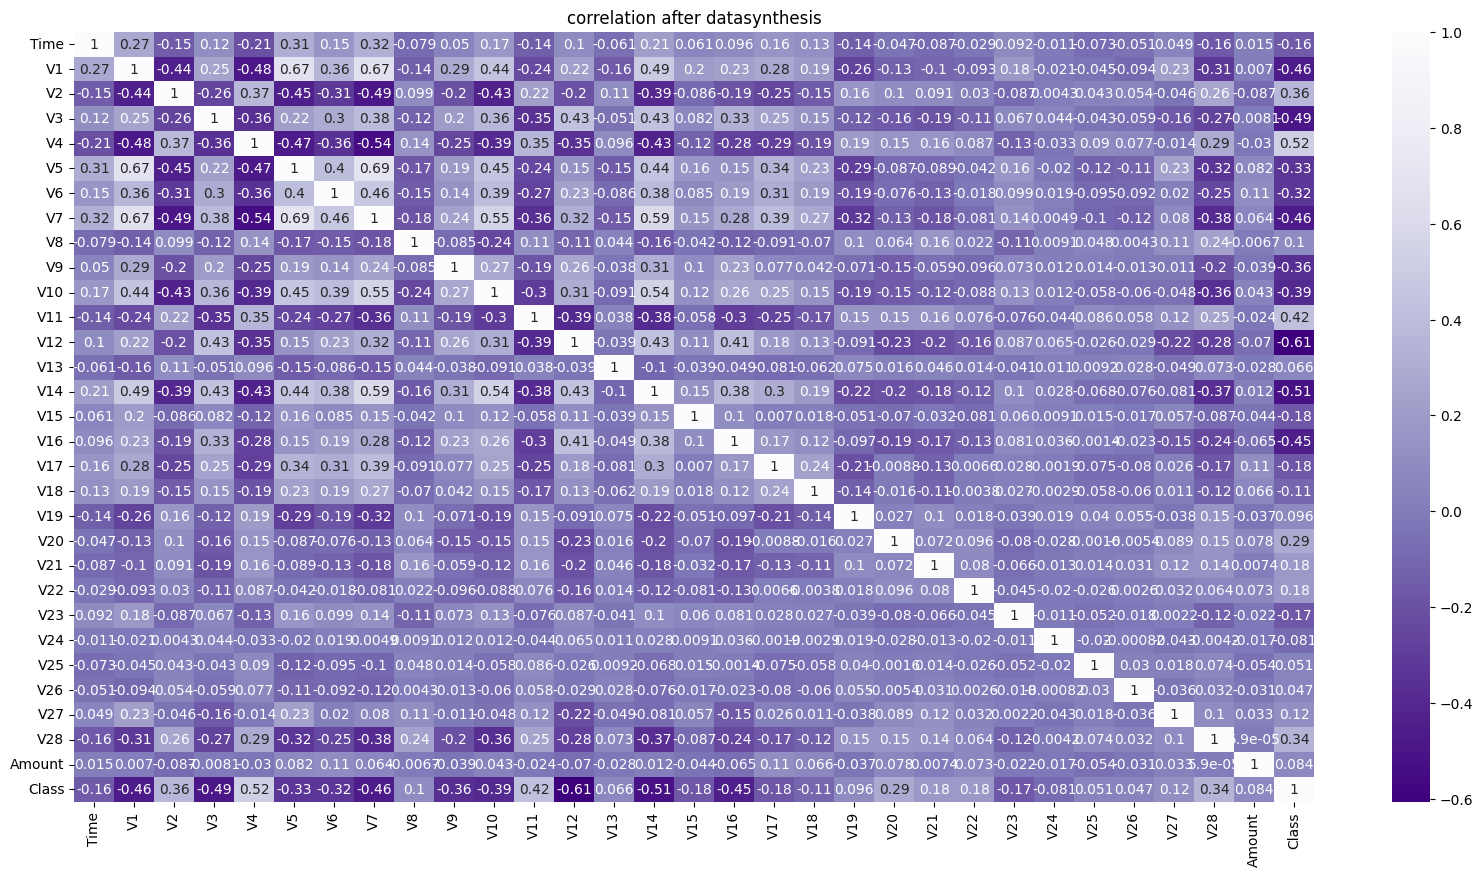

In [23]:
import seaborn as sns
corr_mat=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat, annot=True,cmap='Purples_r')
plt.title("correlation after datasynthesis")
plt.show()

In [26]:
from sklearn.feature_selection import VarianceThreshold

In [27]:
v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(x)

VarianceThreshold(threshold=0)

In [29]:
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])